In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")

In [3]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train.shape

(165034, 14)

In [5]:
train.CustomerId.nunique()

23221

In [6]:
train_new = train.drop(['CustomerId','Surname','id'], axis= 1)

In [7]:
train_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


array([<Axes: title={'center': '0'}, ylabel='Frequency'>,
       <Axes: title={'center': '1'}, ylabel='Frequency'>], dtype=object)

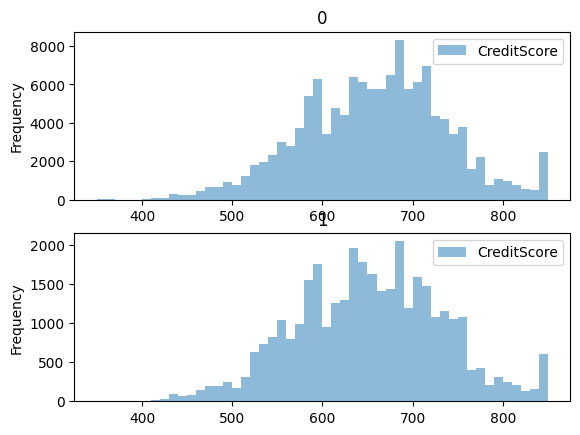

In [8]:
train.plot.hist(column = ['CreditScore'],bins=50, alpha=0.5, by = 'Exited')

In [9]:
train_new.Geography.value_counts()/len(train_new)

Geography
France     0.570882
Spain      0.219428
Germany    0.209690
Name: count, dtype: float64

In [10]:
new = pd.DataFrame(train.groupby(by = ['Geography','Exited'])['Exited'].count()/len(train_new)).unstack(level = -1).reset_index()
new.columns = new.columns.map(lambda x: x[1])
new = new.rename({'':'Geography'}, axis = 1)

In [11]:
new

,Geography,0,1
0,France,0.476526,0.094356
1,Germany,0.130228,0.079462
2,Spain,0.181647,0.037780


In [12]:
train_new.Exited.value_counts()/len(train_new)

Exited
0    0.788401
1    0.211599
Name: count, dtype: float64

In [13]:
train_new['Tenure'] = train_new['Tenure'].astype('category')
train_new['NumOfProducts'] = train_new['NumOfProducts'].astype('category')

In [14]:
train_new = pd.get_dummies(train_new)

In [15]:
train_new.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,0.00,1.0,0.0,181449.97,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,627,33.0,0.00,1.0,1.0,49503.50,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,678,40.0,0.00,1.0,0.0,184866.69,0,True,False,False,...,False,False,False,False,False,True,False,True,False,False
3,581,34.0,148882.54,1.0,1.0,84560.88,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,716,33.0,0.00,1.0,1.0,15068.83,0,False,False,True,...,True,False,False,False,False,False,False,True,False,False


In [16]:
train_new.columns

Index(['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Tenure_0',
       'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6',
       'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [17]:
train_new_normal = train_new[['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]

In [18]:
train_new_ord = train_new[['Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Tenure_0',
       'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6',
       'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4']]

In [19]:
def transform(x):
    return x.apply(lambda y:1 if y == True else 0)

In [20]:
train_new_ord = train_new_ord.apply(lambda x:transform(x))

In [21]:
train_new = pd.concat([train_new_normal,train_new_ord], axis = 1)

In [22]:
train_new.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,668,33.0,0.00,1.0,0.0,181449.97,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,627,33.0,0.00,1.0,1.0,49503.50,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,678,40.0,0.00,1.0,0.0,184866.69,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,581,34.0,148882.54,1.0,1.0,84560.88,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,716,33.0,0.00,1.0,1.0,15068.83,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
x = sc.fit_transform(train_new.drop('Exited', axis = 1))
y = train_new['Exited']